In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from explore import print_metrics, get_theoretical_quantiles, compute_likelihood_reg
import seaborn as sns
from scipy.stats import probplot
import math

In [44]:
df = pd.read_csv(r"C:\Users\meeta\OneDrive\Documents\py_projects\soccer_simple_reg\data\raw\EPL_Soccer_MLR_LR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [45]:
df

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50


In [46]:
df.corr(numeric_only=True)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


#### Manually verifying Pearson's correlation coefficient for features score and cost

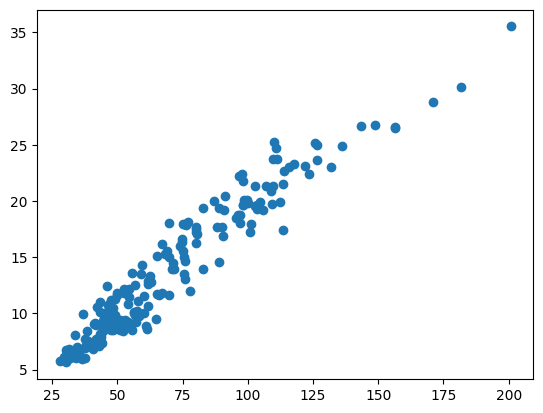

In [47]:
plt.scatter(df["Cost"], df["Score"])
plt.show()

In [48]:
x = df["Cost"]
y = df["Score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)

In [49]:
x_train = sm.add_constant(x_train)
x_train

,const,Cost
52,1.0,181.7
74,1.0,131.9
28,1.0,74.7
29,1.0,113.5
89,1.0,109.0
...,...,...
87,1.0,46.1
103,1.0,50.9
67,1.0,49.9
24,1.0,76.2


In [50]:
lr = sm.OLS(y_train, x_train).fit()

In [51]:
compute_likelihood_reg(df, ["Cost"], "Score")

Intercept: 0.8733647427348007
Cost: 0.18304454914272789


-389.4526884504305

In [52]:
lr.params

const    0.947185
Cost     0.182083
dtype: float64

In [53]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           6.91e-88
Time:                        07:14:51   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
train_df = pd.DataFrame({"Cost": x_train["Cost"], "Score": y_train})
train_df

,Cost,Score
52,181.7,30.10
74,131.9,23.01
28,74.7,16.58
29,113.5,21.47
89,109.0,20.86
...,...,...
87,46.1,10.15
103,50.9,8.56
67,49.9,11.77
24,76.2,17.89


In [31]:
compute_likelihood_reg(train_df, ["Cost"], "Score")

Intercept: 0.9471853461853106
Cost: 0.18208264626002543


-293.2326752918923

In [125]:
lr.fvalue, lr.f_pvalue

(np.float64(1976.329442219898), np.float64(6.907261096258897e-88))

In [126]:
print_metrics(df=train_df, regressors=["Cost"], label="Score")


Correlation between regressors and label: 
--------
Regressor: Cost
Correlation: 0.9643097125454517
--------
Residual squared error: 2.884191045985443
Residual_standard_error: 1.698290624712226
R-squared: 0.9298932217094917
Adjusted R-squared: 0.9294227064189514
Slope estimate: 0.18208264626002543
Intercept estimate: 0.9471853461853161
Slope standard error: 0.004095801363176402
Intercept standard error: 0.32480986101528414

T-value for 95% confidence interval: 1.976013177679155
Slope margin of error: 0.008093357466792817
Interval of slope for 95 % confidence interval: 0.1739892887932326 to 0.19017600372681825
t-statistic for slope: 44.45592696390324
p-value for slope: 0.0

Intercept margin of error: 0.6418285656063363
Interval of intercept for 95 % confidence interval: 0.30535678057897986 to 1.5890139117916524
t-statistic for intercept: 2.9161225069479824
p-value for intercept: 0.004092334272898901

--------

F-statistic: 1976.3294422198985
P-value for F-statistic: 6.907261096258624e-

In [127]:
b0 = lr.params.loc["const"]
b1 = lr.params.loc["Cost"]

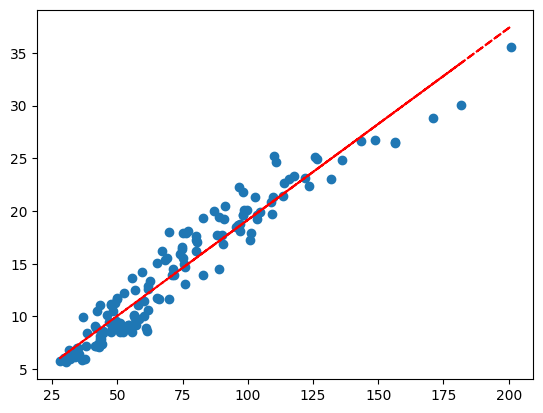

In [128]:
plt.scatter(x_train["Cost"], y_train)
plt.plot(x_train["Cost"], b0 + b1 * x_train["Cost"], color="red", linestyle="--")

plt.show()

#### Confidence intervals exploration between seaborn and manual approaches

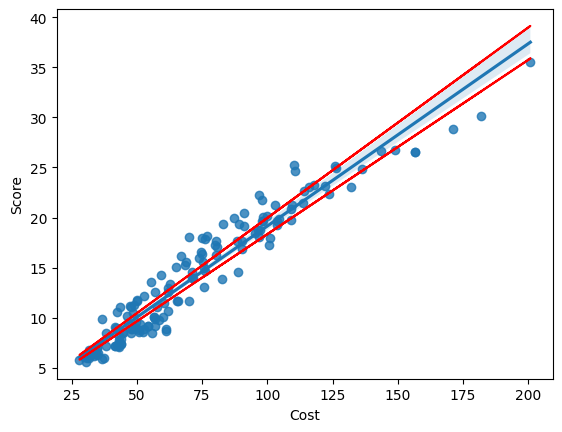

In [129]:
sns.regplot(x="Cost", y="Score", data=train_df)

cost_high = 0.19017600372681825
cost_low = 0.1739892887932326

plt.plot(x_train["Cost"], b0 + cost_high * x_train["Cost"], color="red")
plt.plot(x_train["Cost"], b0 + cost_low * x_train["Cost"], color="red")

plt.show()

In [130]:
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

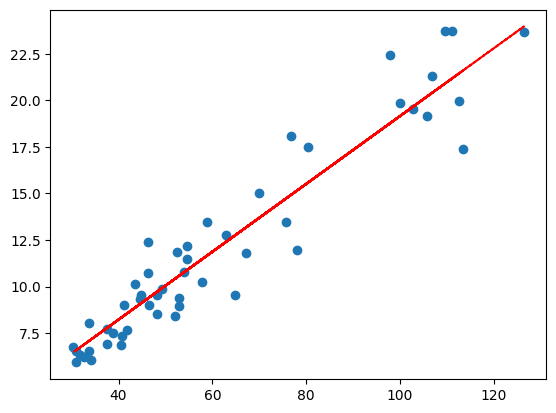

In [131]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, color="red", linestyle="--")
plt.show()

### Diagnostic plots for linear regression and assumptions underlying the linear model

In [132]:
residuals = y_train - lr.fittedvalues

#### Residual Analysis

##### Residuals vs predictor variable

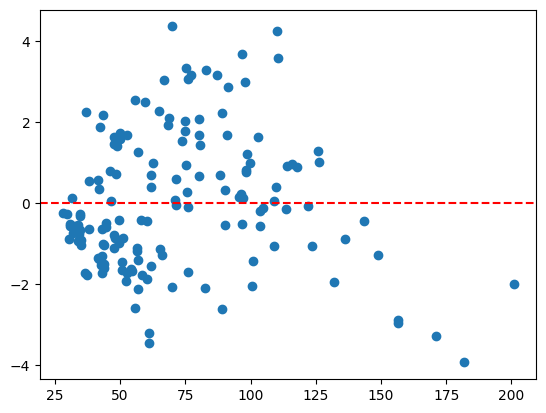

In [133]:
plt.scatter(x_train["Cost"], residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

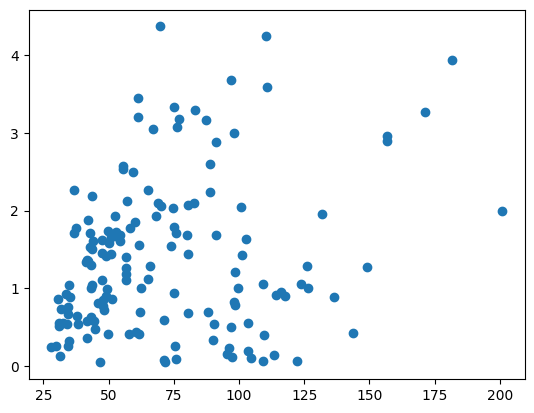

In [134]:
plt.scatter(x_train["Cost"], np.abs(lr.resid))
plt.show()

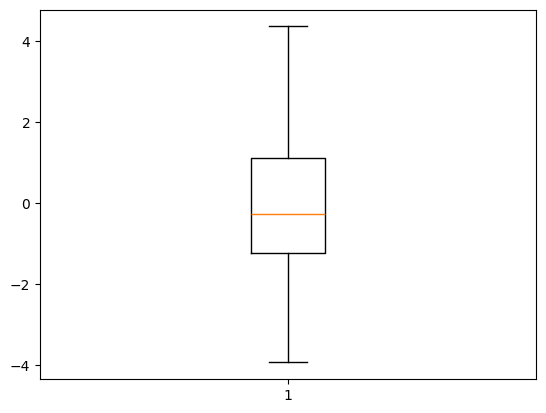

In [135]:
plt.boxplot(residuals)
plt.show()

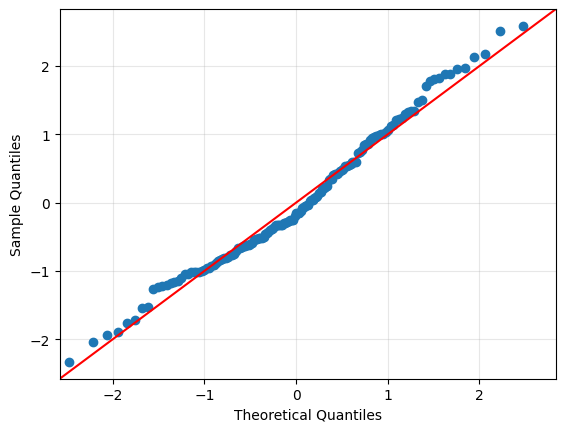

In [136]:
fig = sm.qqplot(residuals, line="45", fit=True)
plt.grid(True, alpha=0.3)
plt.show()

In [137]:
theoretical_quantiles = get_theoretical_quantiles(n=len(residuals))
standardized_residuals = (residuals - residuals.mean()) / np.std(residuals, ddof=1)

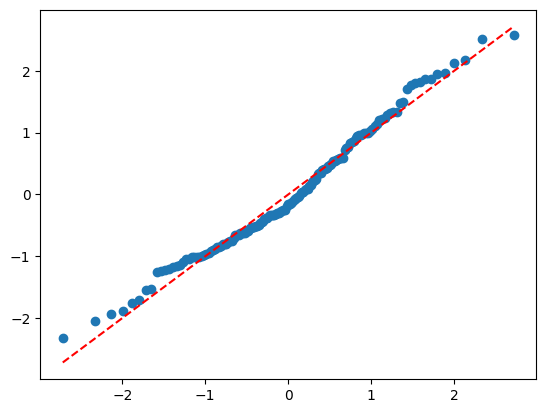

In [138]:
plt.scatter(theoretical_quantiles, np.sort(standardized_residuals))

plt.plot(theoretical_quantiles, theoretical_quantiles, color="red", linestyle="--")
plt.show()

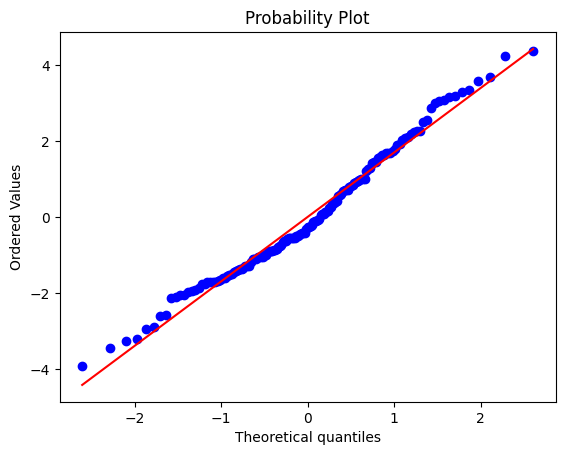

In [139]:
probplot(residuals, plot=plt)
plt.show()

<Axes: ylabel='Count'>

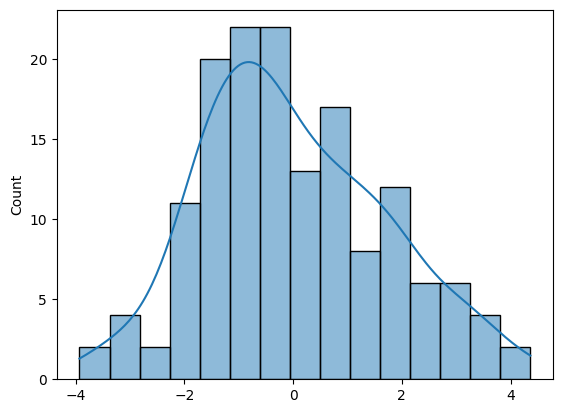

In [142]:
sns.histplot(residuals, kde=True, bins=15)